<div class="alert alert-block alert-info"><font size="6"><b>Sprint 8 Task 1 (S08_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Grab a sports-themed dataset you like and normalize categorical attributes in dummy variables. Standardize numeric attributes with StandardScaler.</SPAN>

To solve this practice we start by **importing** all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

For this lab I am going to use the same dataset that I have been using for the last Sprints, ATP tennis matches for 2018 but with all ariginal columns and no NaN removal as I want to redo those operations in this notebook.


**Columns reference:**
* w for winner, l for loser
* ace = absolute number of aces  
* df = number of double faults  
* svpt = total serve points  
* 1stin = 1st serve in  
* 1stwon = points won on 1st serve  
* 2ndwon = points won on 2nd serve  
* SvGms = serve games  
* bpSaved = break point saved  
* bpFaced = break point faced  


**Source:** https://www.kaggle.com/datasets/pablodroca/atp-tennis-matches-20002019?select=atp_matches_2019.csv

Let's read the file:

In [2]:
atp_2018 = pd.read_csv('atp_2018.csv', index_col = 0) 
pd.set_option('display.max_columns', 50)
atp_2018.sample(5)

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2526,2018-M-DC-2018-G1-EPA-M-AUT-BLR-01,Davis Cup G1 R1: AUT vs BLR,20180202,Clay,"Thiem, Dominic",AUT,"Zhyrmont, Dzmitry",BLR,6-3 6-3,3,RR,73.0,5.0,1.0,56.0,38.0,28.0,12.0,9.0,2.0,2.0,4.0,2.0,58.0,31.0,23.0,11.0,9.0,1.0,4.0,6.0,4060.0,389.0,106.0
1785,2018-M006,Indian Wells Masters,20180305,Hard,"Delbonis, Federico",ARG,"Harrison, Ryan",USA,6-2 4-6 7-5,3,R128,143.0,3.0,8.0,107.0,65.0,47.0,16.0,15.0,8.0,12.0,4.0,4.0,88.0,51.0,37.0,13.0,15.0,6.0,12.0,67.0,800.0,54.0,945.0
1104,2018-M021,Madrid Masters,20180507,Clay,"Paire, Benoit",FRA,"Pouille, Lucas",FRA,6-2 6-3,3,R64,80.0,4.0,3.0,71.0,47.0,37.0,9.0,9.0,8.0,9.0,2.0,3.0,65.0,40.0,22.0,11.0,8.0,4.0,8.0,50.0,1020.0,18.0,1995.0
302,2018-M004,Acapulco,20180226,Hard,"Zverev, Alexander",GER,"Mcdonald, Mackenzie",USA,6-3 7-5,3,R32,80.0,7.0,0.0,63.0,40.0,31.0,16.0,11.0,1.0,1.0,1.0,6.0,69.0,36.0,27.0,14.0,10.0,8.0,10.0,5.0,4450.0,140.0,392.0
209,2018-M-DC-2018-WG-M-ITA-JPN-01,Davis Cup WG R1: ITA vs JPN,20180202,Hard,"Fognini, Fabio",ITA,"Sugita, Yuichi",JPN,3-6 6-1 3-6 7-6(6) 7-5,5,RR,248.0,12.0,14.0,181.0,104.0,73.0,28.0,25.0,13.0,22.0,14.0,6.0,166.0,94.0,61.0,29.0,24.0,11.0,21.0,22.0,1850.0,41.0,1235.0


There's no use of the **score** column as it is. I'm going to take divide it into two columns, one for winner score or **w_score** and the other one for loser score or **l_score**. Also I will convert values to numeric type.

In [3]:
# A list of list with scores separated with Regex help
w_score = atp_2018['score'].str.findall('([0-7])-')
l_score = atp_2018['score'].str.findall('-([0-7])')

# List with scores sum for each match
for i in range(len(atp_2018['score'])):
    w_score[i] = sum(map(int, w_score[i]))
    l_score[i] = sum(map(int, l_score[i]))

# Insert new columns to dataframe, type numeric
atp_2018.insert(9, 'w_score', w_score)
atp_2018.w_score = pd.to_numeric(atp_2018.w_score)
atp_2018.insert(10, 'l_score', l_score)
atp_2018.l_score = pd.to_numeric(atp_2018.l_score)

Later on I will eliminate **score** column but I still need it for NaN treatment.

In [4]:
atp_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2889 non-null   object 
 1   tourney_name        2889 non-null   object 
 2   tourney_date        2889 non-null   int64  
 3   surface             2889 non-null   object 
 4   winner              2889 non-null   object 
 5   country_winner      2889 non-null   object 
 6   loser               2889 non-null   object 
 7   country_loser       2889 non-null   object 
 8   score               2889 non-null   object 
 9   w_score             2889 non-null   int64  
 10  l_score             2889 non-null   int64  
 11  best_of             2889 non-null   int64  
 12  round               2889 non-null   object 
 13  minutes             2854 non-null   float64
 14  w_ace               2863 non-null   float64
 15  w_df                2863 non-null   float64
 16  w_svpt

Now let's transform the **tourney_date** column dtype from an object to date:

In [5]:
atp_2018['tourney_date'] = pd.to_datetime(atp_2018['tourney_date'].astype(str), format = '%Y%m%d')

Let's see about NaN values:

In [6]:
atp_2018.isnull().sum()

tourney_id             0
tourney_name           0
tourney_date           0
surface                0
winner                 0
country_winner         0
loser                  0
country_loser          0
score                  0
w_score                0
l_score                0
best_of                0
round                  0
minutes               35
w_ace                 26
w_df                  26
w_svpt                26
w_1stIn               26
w_1stWon              26
w_2ndWon              26
w_SvGms               26
w_bpSaved             26
w_bpFaced             26
l_ace                 26
l_df                  26
l_svpt                26
l_1stIn               26
l_1stWon              26
l_2ndWon              26
l_SvGms               26
l_bpSaved             26
l_bpFaced             26
winner_rank            7
winner_rank_points     7
loser_rank            31
loser_rank_points     31
dtype: int64

Not that many NaN's. Now let's see the **minutes** column in detail as it is an importan variable in the dataframe.

In [7]:
atp_2018[atp_2018.minutes.isnull()]

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,w_score,l_score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
276,2018-5014,Shanghai Masters,2018-10-08,Hard,"Cecchinato, Marco",ITA,"Chung, Hyeon",KOR,4-6 7-6(5) 7-6(5),18,18,3,R32,NaN,7.0,2.0,113.0,85.0,58.0,16.0,17.0,4.0,8.0,6.0,0.0,109.0,84.0,57.0,15.0,17.0,2.0,5.0,21.0,1768.0,26.0,1630.0
301,2018-5014,Shanghai Masters,2018-10-08,Hard,"Bautista Agut, Roberto",ESP,"Mcdonald, Mackenzie",USA,3-6 6-4 6-1,15,11,3,R32,NaN,4.0,2.0,74.0,54.0,41.0,8.0,13.0,3.0,6.0,5.0,3.0,83.0,59.0,39.0,8.0,13.0,8.0,13.0,28.0,1570.0,78.0,701.0
309,2018-6242,Winston Salem,2018-08-20,Hard,"Harrison, Ryan",USA,"Simon, Gilles",FRA,W/O,0,0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,955.0,39.0,1080.0
392,2018-5014,Shanghai Masters,2018-10-08,Hard,"Zverev, Alexander",GER,"Basilashvili, Nikoloz",RUS,7-5 6-4,13,9,3,R32,NaN,12.0,0.0,63.0,43.0,36.0,9.0,11.0,4.0,5.0,9.0,5.0,73.0,46.0,32.0,12.0,11.0,7.0,10.0,5.0,4755.0,23.0,1757.0
395,2018-M-DC-2018-G2-EPA-M-GEO-MAR-01,Davis Cup G2 R1: GEO vs MAR,2018-02-03,Clay,"Ouahab, Lamine",ALG,"Basilashvili, Nikoloz",RUS,6-1 6-3,12,4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,49.0,57.0,916.0
456,2018-M006,Indian Wells Masters,2018-03-05,Hard,"Raonic, Milos",CAN,"Baghdatis, Marcos",CYP,W/O,0,0,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,1270.0,102.0,564.0
498,2018-5014,Shanghai Masters,2018-10-08,Hard,"Querrey, Sam",USA,"Fritz, Taylor Harry",USA,6-3 6-7(4) 7-5,19,15,3,R32,NaN,13.0,3.0,104.0,71.0,58.0,16.0,17.0,3.0,4.0,12.0,3.0,95.0,61.0,42.0,21.0,16.0,1.0,4.0,57.0,920.0,59.0,858.0
640,2018-5014,Shanghai Masters,2018-10-08,Hard,"Edmund, Kyle",GBR,"Seppi, Andreas",ITA,6-3 6-4,12,7,3,R32,NaN,8.0,1.0,62.0,43.0,33.0,10.0,10.0,3.0,4.0,3.0,2.0,62.0,39.0,28.0,9.0,9.0,3.0,6.0,14.0,1990.0,47.0,1021.0
727,2018-0311,London,2018-06-18,Grass,"Lopez, Feliciano",ESP,"Raonic, Milos",CAN,W/O,0,0,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,1190.0,31.0,1405.0
728,2018-0410,Monte Carlo Masters,2018-04-16,Clay,"Cilic, Marin",CRO,"Raonic, Milos",CAN,W/O,0,0,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4985.0,22.0,1765.0


Rows with "W/O" in the **score** column are games that were scheduled but not played. That's why we didn't remove the **score** column earlier. I'm dropping these rows. Perhaps they could be the subject of a separate study.

In [8]:
atp_2018.drop(atp_2018[atp_2018.score == 'W/O'].index, inplace = True)

There are some rows with NaN's in almost every cell, and cell's without NaN values aren't very usefull. I'll get rid of these rows.

In [9]:
atp_2018.dropna(axis = 0, thresh = 33, inplace = True) # we have 36 columns, I want at least 33 with values in each row

Now there are some rows where the only missin value are the **minutes** of the match. All these rows are matches to the best of 3 games so I'm going to fill this NaN's with the mean of minutes played in "best of 3" matches.

In [10]:
mean_bo3 = atp_2018.groupby('best_of')['minutes'].mean().values[0] # mean "best of 3" matches
atp_2018.minutes.fillna(mean_bo3, downcast='float64', inplace = True)

That's it for **minutes** column.

Let's see now the last four columns with **ranks** for loser and winner:


In [11]:
atp_2018[atp_2018.loser_rank_points.isnull()]

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,w_score,l_score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
596,2018-7434,Sofia,2018-02-05,Hard,"Istomin, Denis",UZB,"Andreev, Adrian",BUL,6-3 6-4,12,7,3,R32,78.0,3.0,0.0,56.0,36.0,27.0,9.0,10.0,1.0,4.0,1.0,3.0,58.0,39.0,18.0,10.0,9.0,4.0,9.0,74.0,713.0,NaN,NaN
597,2018-M-DC-2018-G1-AO-M-PAK-UZB-01,Davis Cup G1 R2: PAK vs UZB,2018-04-06,Grass,"Istomin, Denis",UZB,"Qureshi, Aisam Ul Haq",PAK,7-6(17) 4-1 RET,11,7,3,RR,356.0,3.0,1.0,69.0,42.0,35.0,19.0,9.0,2.0,2.0,7.0,6.0,57.0,35.0,31.0,12.0,8.0,0.0,1.0,83.0,673.0,NaN,NaN
2329,2018-0451,Doha,2018-01-01,Hard,"Travaglia, Stefano",ITA,"Al Mutawa, Jabor",QAT,6-1 6-2,12,3,3,R32,53.0,8.0,2.0,34.0,20.0,19.0,9.0,7.0,0.0,0.0,0.0,2.0,50.0,40.0,19.0,3.0,8.0,4.0,9.0,134.0,414.0,NaN,NaN
2650,2018-M-DC-2018-G2-AM-M-ESA-URU-01,Davis Cup G2 R1: ESA vs URU,2018-02-03,Hard,"Cuevas, Pablo",URU,"Alvarado Larin, Alberto Emmanuel",ESA,6-1 6-3,12,4,3,RR,55.0,3.0,2.0,41.0,28.0,25.0,8.0,8.0,1.0,1.0,1.0,6.0,68.0,44.0,26.0,8.0,8.0,4.0,8.0,32.0,1380.0,NaN,NaN
2682,2018-0301,Auckland,2018-01-08,Hard,"Bautista Agut, Roberto",ESP,"Venus, Michael",NZL,6-2 6-1,12,3,3,R32,56.0,3.0,1.0,51.0,37.0,29.0,7.0,8.0,5.0,6.0,3.0,3.0,42.0,18.0,11.0,4.0,7.0,2.0,7.0,21.0,1855.0,NaN,NaN
2683,2018-M-DC-2018-G1-AO-M-CHN-NZL-01,Davis Cup G1 R1: CHN vs NZL,2018-02-02,Hard,"Zhang, Ze",CHN,"Venus, Michael",NZL,5-7 6-1 6-2,17,10,3,RR,108.0,8.0,6.0,90.0,52.0,38.0,20.0,14.0,2.0,4.0,10.0,6.0,91.0,43.0,29.0,23.0,13.0,8.0,14.0,194.0,274.0,NaN,NaN
2756,2018-M-DC-2018-G1-AM-M-COL-BAR-01,Davis Cup G1 R1: COL vs BAR,2018-02-02,Hard,"Galan Riveros, Daniel Elahi",COL,"Lewis, Haydn",BAR,6-0 6-4,12,4,3,RR,59.0,2.0,1.0,50.0,32.0,23.0,12.0,8.0,3.0,3.0,2.0,2.0,47.0,23.0,14.0,10.0,8.0,1.0,5.0,292.0,168.0,NaN,NaN
2759,2018-M-DC-2018-G1-AM-M-COL-BAR-01,Davis Cup G1 R1: COL vs BAR,2018-02-02,Hard,"Rodriguez, Cristian",COL,"Lawrence, Xavier",BAR,6-3 6-0,12,3,3,RR,59.0,2.0,3.0,50.0,32.0,24.0,11.0,8.0,3.0,3.0,0.0,4.0,49.0,31.0,17.0,6.0,7.0,7.0,11.0,388.0,106.0,NaN,NaN
2763,2018-M-DC-2018-G1-AO-M-KOR-PAK-01,Davis Cup G1 R1: KOR vs PAK,2018-02-02,Grass,"Akbar, M Abid Ali Khan",PAK,"Park, Minjong",KOR,7-6(2) 7-6(5),14,12,3,RR,103.0,3.0,2.0,82.0,49.0,33.0,16.0,12.0,4.0,7.0,1.0,3.0,89.0,50.0,29.0,20.0,12.0,6.0,9.0,1753.0,1.0,NaN,NaN
2781,2018-M-DC-2018-G2-EPA-M-EGY-NOR-01,Davis Cup G2 R1: EGY vs NOR,2018-02-03,Hard,"Hossam, Youssef",EGY,"Anker, Peter August",NOR,6-4 6-0,12,4,3,RR,53.0,6.0,1.0,52.0,35.0,25.0,8.0,8.0,6.0,8.0,3.0,1.0,49.0,33.0,12.0,7.0,8.0,1.0,7.0,296.0,165.0,NaN,NaN


There are some remaining NaN's in **winner_rank**, **winner_rank_points** and **loser_rank**, **loser_rank_points** columns. These last 4 columns I think they are not very useful but I do not want to lose data by dropping the entire row so I will estimate missing values.
If we take a look at those rows we would see that these matches are almost all of them "not so important" Davis Cup matches. I'm goin to estimate with max value from column for **winner_rank** and **loser_rank** and min value from column for **winner_rank_points** and **loser_rank_points**.

In [12]:
atp_2018.winner_rank.fillna(atp_2018.winner_rank.max(), inplace = True)
atp_2018.winner_rank_points.fillna(atp_2018.winner_rank.min(), inplace = True)
atp_2018.loser_rank.fillna(atp_2018.loser_rank.max(), inplace = True)
atp_2018.loser_rank_points.fillna(atp_2018.loser_rank_points.min(), inplace = True)

Finally I will reset de index column, drop **score** column and change type for the **best_of** attribute to category as I want to convert it into a dummy variable.

In [13]:
atp_2018.reset_index(drop = True, inplace = True) # reset index
atp_2018.drop(columns = ['score'], inplace = True) # eliminate columns
atp_2018['best_of'] = atp_2018.best_of.astype('category') # change type for dummy variable

<u>**Dummy Variables**</u>

In this case we have two attributes that would be interesting to convert to dummy: **surface** of the match: Clay, Grass or Hard and **best_of**: 3 games o 5 games.

How many columns do we have?

In [14]:
atp_2018dumm = atp_2018
atp_2018dumm.shape

(2860, 35)

In [15]:
atp_2018dumm = pd.get_dummies(data = atp_2018dumm, columns=['surface', 'best_of'])
# atp_2018dumm = pd.get_dummies(data = atp_2018) # For all categorial variables

In [16]:
atp_2018dumm.sample(5)

,tourney_id,tourney_name,tourney_date,winner,country_winner,loser,country_loser,w_score,l_score,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,surface_Clay,surface_Grass,surface_Hard,best_of_3,best_of_5
2642,2018-M-DC-2018-G2-AM-M-URU-MEX-01,Davis Cup G2 R3: URU vs MEX,2018-09-15,"Cuevas, Pablo",URU,"Lopez Villasenor, Gerardo",MEX,14,15,RR,143.0,5.0,4.0,77.0,43.0,30.0,11.0,14.0,0.0,6.0,2.0,7.0,114.0,62.0,39.0,21.0,14.0,6.0,12.0,68.0,805.0,737.0,29.0,1,0,0,1,0
1223,2018-0414,Hamburg,2018-07-23,"Mayer, Leonardo",ARG,"Monfils, Gael",FRA,13,6,R16,80.0,3.0,2.0,62.0,46.0,32.0,7.0,10.0,2.0,4.0,3.0,4.0,49.0,28.0,14.0,7.0,9.0,3.0,8.0,36.0,1197.0,37.0,1160.0,1,0,0,1,0
1534,2018-0496,Marseille,2018-02-19,"Khachanov, Karen",RUS,"Berdych, Tomas",CZE,12,5,SF,74.0,8.0,1.0,46.0,29.0,26.0,9.0,8.0,3.0,3.0,3.0,2.0,75.0,48.0,32.0,6.0,9.0,10.0,14.0,47.0,1030.0,17.0,2230.0,0,0,1,1,0
1171,2018-M010,S-Hertogenbosch,2018-06-11,"Ebden, Matthew",AUS,"Smyczek, Tim",USA,12,5,R32,60.0,3.0,2.0,43.0,21.0,18.0,15.0,8.0,1.0,1.0,3.0,6.0,62.0,40.0,29.0,3.0,9.0,6.0,10.0,69.0,833.0,125.0,454.0,0,1,0,1,0
854,2018-0328,Basel,2018-10-22,"Laaksonen, Henri",SUI,"Cecchinato, Marco",ITA,12,6,R32,76.0,6.0,5.0,57.0,30.0,28.0,12.0,9.0,3.0,3.0,2.0,4.0,74.0,46.0,27.0,13.0,9.0,7.0,10.0,175.0,315.0,21.0,1838.0,0,0,1,1,0


In [17]:
atp_2018dumm.shape

(2860, 38)

Five new columns have been created and two have been dropped, so we have 38 columns now.

<u>**Standard Scaler**</u>

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

First we import required library:

In [18]:
from sklearn.preprocessing import StandardScaler

Now I'm going to extract columns and labels from original **atp_2018** with numeric values that are going to be standarized:

In [19]:
atp_2018_numss = atp_2018.select_dtypes(include = ['float64', 'int64']) # numeric cols dataframe
cols_sscaler = atp_2018_numss.columns # numeric cols index
cols_sscaler 

Index(['w_score', 'l_score', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points'],
      dtype='object')

In [20]:
atp_2018_numss.head()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,15,12,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,12,6,72.0,3.0,3.0,47.0,29.0,27.0,10.0,9.0,0.0,0.0,7.0,5.0,54.0,31.0,24.0,8.0,9.0,2.0,5.0,16.0,1985.0,41.0,1061.0
2,14,12,121.0,3.0,1.0,83.0,58.0,39.0,16.0,12.0,6.0,8.0,5.0,2.0,93.0,53.0,39.0,18.0,12.0,5.0,7.0,62.0,906.0,36.0,1227.0
3,18,14,176.0,5.0,4.0,112.0,70.0,56.0,20.0,16.0,8.0,9.0,10.0,8.0,107.0,54.0,42.0,25.0,15.0,4.0,7.0,36.0,1366.0,45.0,1080.0
4,13,15,132.0,4.0,8.0,90.0,42.0,33.0,23.0,14.0,6.0,9.0,9.0,4.0,87.0,57.0,45.0,12.0,14.0,2.0,4.0,81.0,715.0,36.0,1197.0


Let's do a graph to show attributes before Standar Scaling them. Because the last four columns are in the thousands and the others in decens, it's quite difficult if not impossible to analyase this graph.

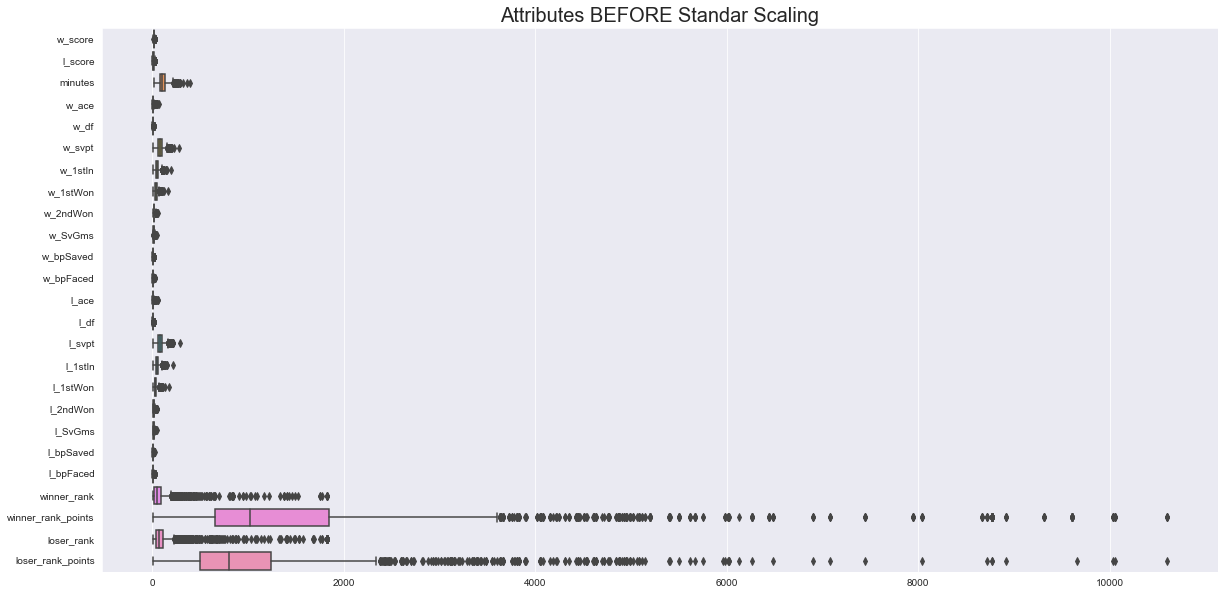

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
bxplot = sns.boxplot(data = atp_2018_numss, orient="h")
plt.title(label = 'Attributes BEFORE Standar Scaling', fontsize=20)
plt.show()

Now let's proceed to scale attributes:

In [22]:
scaler = StandardScaler().fit(atp_2018_numss)
atp_2018_numss = scaler.transform(atp_2018_numss)
atp_2018_numss = pd.DataFrame(atp_2018_numss, columns = cols_sscaler)
atp_2018_numss.head()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,-0.086457,0.291612,0.293703,0.250788,-0.347370,0.072032,-0.028740,0.087218,0.472648,0.026264,1.530713,1.020874,0.800630,-0.196776,-0.103976,-0.167016,-0.069017,0.524586,0.311401,-1.147351,-1.078656,-0.223609,-0.361274,-0.310005,-0.147693
1,-0.831983,-0.915057,-0.920209,-0.751664,0.072705,-1.119176,-1.070505,-0.763401,-0.996351,-0.889779,-1.161478,-1.273686,0.240639,0.582158,-0.987696,-0.995938,-0.680757,-1.020394,-0.841040,-0.844441,-0.839067,-0.414330,0.182525,-0.355327,-0.003250
2,-0.334965,0.291612,0.246098,-0.751664,-0.767446,0.106066,0.440055,0.087218,-0.114952,-0.202747,0.857665,0.765923,-0.132688,-0.586243,0.337884,0.143829,0.338810,0.384133,-0.149575,0.064289,-0.359887,-0.131325,-0.419279,-0.375929,0.154498
3,0.659070,0.693835,1.555219,-0.417513,0.492781,1.093067,1.065114,1.292262,0.472648,0.713296,1.530713,1.020874,0.800630,1.750559,0.813733,0.195637,0.542723,1.367303,0.541889,-0.238621,-0.359887,-0.291284,-0.162718,-0.338847,0.014806
4,-0.583474,0.894946,0.507922,-0.584588,2.173083,0.344308,-0.393357,-0.338091,0.913347,0.255275,0.857665,1.020874,0.613966,0.192691,0.133948,0.351060,0.746637,-0.458583,0.311401,-0.844441,-1.078656,-0.014432,-0.525808,-0.375929,0.125989


In [23]:
round(atp_2018_numss.describe(), 2)

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00,2860.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.32,-2.12,-2.28,-1.25,-1.19,-2.41,-2.32,-2.39,-2.17,-2.49,-1.16,-1.27,-1.07,-1.37,-2.45,-2.29,-2.24,-2.00,-2.45,-1.45,-2.04,-0.51,-0.92,-0.52,-1.01
25%,-0.83,-0.71,-0.75,-0.75,-0.77,-0.74,-0.71,-0.69,-0.70,-0.66,-0.82,-0.76,-0.69,-0.59,-0.75,-0.74,-0.75,-0.74,-0.84,-0.84,-0.84,-0.39,-0.56,-0.37,-0.54
50%,-0.33,-0.11,-0.21,-0.25,-0.35,-0.17,-0.19,-0.20,-0.11,-0.20,-0.15,-0.25,-0.32,-0.20,-0.17,-0.17,-0.14,-0.18,-0.15,-0.24,-0.12,-0.22,-0.36,-0.24,-0.26
75%,0.66,0.69,0.58,0.42,0.49,0.55,0.54,0.51,0.62,0.48,0.52,0.51,0.43,0.58,0.58,0.56,0.54,0.52,0.54,0.67,0.60,0.03,0.10,-0.06,0.16
max,3.89,3.91,6.79,9.44,5.53,6.74,7.73,9.09,5.76,8.27,5.23,5.10,10.32,5.65,7.07,8.69,9.31,4.88,8.61,5.21,4.67,10.69,4.99,6.98,9.06


If we plot this scaled dataframe:

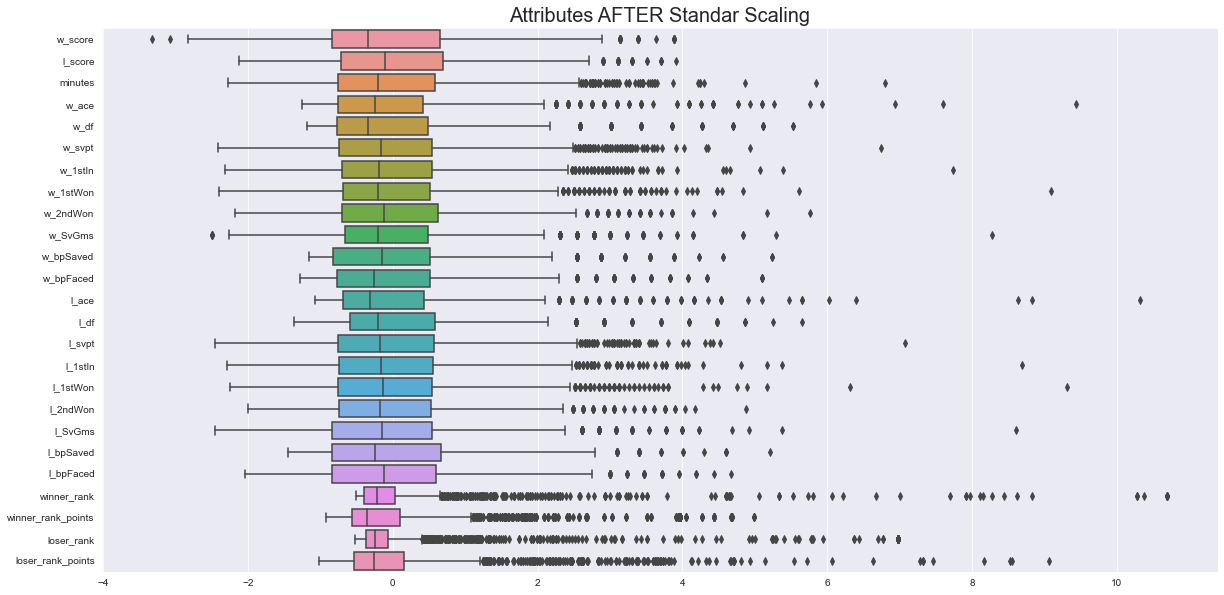

In [24]:
plt.figure(figsize=(20,10))
bxplot = sns.boxplot(data = atp_2018_numss, orient="h")
plt.title(label = 'Attributes AFTER Standar Scaling', fontsize=20)
plt.show()

This is much better and model would be much precise. 

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme data set you like and apply Principal Component Analysis (PCA).</SPAN>

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

There are two main advantages of dimensionality reduction with PCA:

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.

PCA is effected by scale so you need to scale the features in your data before applying PCA.

In [25]:
from sklearn.decomposition import PCA

I make two copies of scaled dataframe from previous practice:

In [26]:
atp_2018_numPCA = atp_2018_numss
atp_2018_numPCA2 = atp_2018_numss

In [27]:
pca = PCA(.95) #95% of the variance is retained
x = pca.fit_transform(atp_2018_numPCA)
atp_2018_numPCA = pd.DataFrame(data = x)
atp_2018_numPCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.602636,-0.366096,1.162481,1.922285,0.029812,-0.073605,-0.402651,-0.627499,0.410137,0.285184,0.952921,0.103581
1,-3.617519,-1.038192,0.070373,-0.242047,1.151819,0.545318,0.243331,-0.356922,-0.208280,0.398829,-0.818859,-0.012206
2,0.353770,0.249756,-0.109350,1.142444,-0.969740,0.388476,-0.879205,-0.369346,0.065715,-0.148127,0.085895,0.106010
3,3.475534,0.232473,0.366137,1.491101,0.985932,0.629958,0.196536,-1.158722,0.394666,-0.320498,-0.394631,0.130538
4,1.096087,0.139333,1.122612,2.014183,1.000351,0.044986,0.402460,0.378856,-1.346817,1.197440,-0.271444,-0.130570


In [28]:
pca_expl = pca.explained_variance_ratio_.round(3) # how much variance exlains each PCA column
pca_expl

array([0.523, 0.084, 0.071, 0.061, 0.039, 0.035, 0.032, 0.029, 0.026,
       0.023, 0.018, 0.016])

In [29]:
pca.explained_variance_ratio_.sum().round(3)

0.958

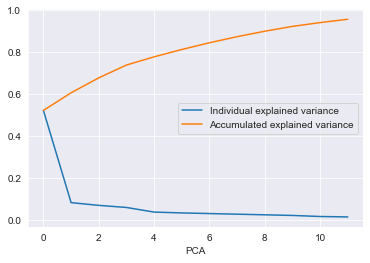

In [30]:
sns.lineplot(data = pca_expl, label = 'Individual explained variance')
sns.lineplot(data = np.cumsum(pca_expl), label = 'Accumulated explained variance' )
plt.xlabel('PCA')
plt.show()

If we wont at least 95% of the variance retained we end up with 12 PCA columns. Remember imput had 38 columns.

First PCA (PCA1) gives us 52,3% of the variance. After that, every PCA gives us very little (compared to PCA1), with a decreasing tendency.

Let's force for only 2 PCA columns and see how much variance is retained. From previous graph we can see that around 60% of variance will be retained.

In [31]:
pca = PCA(n_components = 2) # only two PCA columns
x2 = pca.fit_transform(atp_2018_numPCA2)
atp_2018_numPCA2 = pd.DataFrame(data = x2)
atp_2018_numPCA2.tail()

,0,1
2855,10.550717,2.057795
2856,-2.433491,0.712080
2857,1.754560,0.673841
2858,-4.700635,1.811226
2859,4.719337,3.274388


In [32]:
pca_expl2 = pca.explained_variance_ratio_.round(3)
pca_expl2

array([0.523, 0.084])

In [33]:
pca.explained_variance_ratio_.sum().round(3)

0.606

In this case with only to PCA columns we retain 60.6% of the variance.

In [34]:
atp_2018_PCAconcat = pd.concat([atp_2018_numPCA2, atp_2018['best_of']], axis = 1)
atp_2018_PCAconcat

,0,1,best_of
0,0.602636,-0.366098,3
1,-3.617519,-1.038190,3
2,0.353770,0.249754,3
3,3.475534,0.232470,3
4,1.096087,0.139336,3
...,...,...,...
2855,10.550717,2.057795,5
2856,-2.433491,0.712080,3
2857,1.754560,0.673841,5
2858,-4.700635,1.811226,3


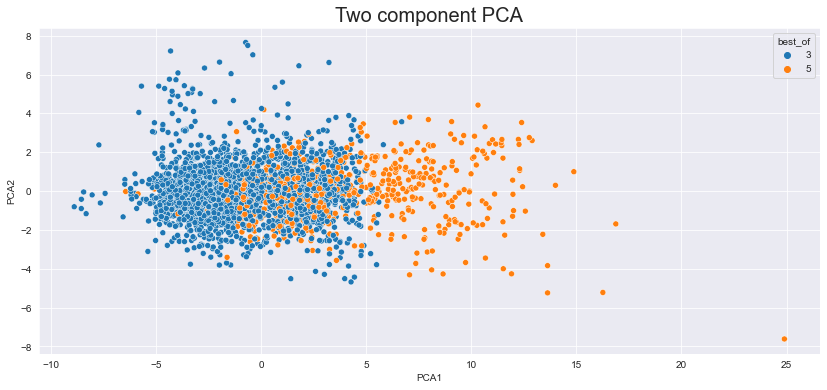

In [35]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = atp_2018_PCAconcat, x = 0, y = 1, hue='best_of')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(label = 'Two component PCA', fontsize=20)
plt.show()

Notice on the graph before that the classes seem quite separated from each other.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme data set you like and normalize the data taking into account the outliers.</SPAN>

First we make a copy of the dataframe with the numerical attributes that we want to normalize:

In [36]:
atp_2018_numn = atp_2018.select_dtypes(include = ['float64', 'int64'])

In [37]:
atp_2018_numn.describe()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000
mean,15.347902,10.550000,110.660686,7.498951,2.826923,79.883566,49.551748,37.769580,16.782517,12.885315,3.451399,4.995804,5.710839,3.505245,83.059091,50.223776,34.015385,15.265035,12.648951,4.787762,8.502098,83.345804,1657.743706,127.240210,1064.419580
std,4.024707,4.973235,42.020283,5.986372,2.380941,29.387071,19.201545,14.109837,6.808548,4.367372,2.972077,3.923006,5.358170,2.568061,29.426232,19.305562,14.714698,7.121076,4.339378,3.301889,4.174532,162.569985,1793.255310,242.748715,1052.499859
min,2.000000,0.000000,15.000000,0.000000,0.000000,9.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,6.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,12.000000,7.000000,79.000000,3.000000,1.000000,58.000000,36.000000,28.000000,12.000000,10.000000,1.000000,2.000000,2.000000,2.000000,61.000000,36.000000,23.000000,10.000000,9.000000,2.000000,5.000000,20.000000,657.500000,37.000000,499.750000
50%,14.000000,10.000000,102.000000,6.000000,2.000000,75.000000,46.000000,35.000000,16.000000,12.000000,3.000000,4.000000,4.000000,3.000000,78.000000,47.000000,32.000000,14.000000,12.000000,4.000000,8.000000,48.000000,1020.000000,68.000000,795.000000
75%,18.000000,14.000000,135.000000,10.000000,4.000000,96.000000,60.000000,45.000000,21.000000,15.000000,5.000000,7.000000,8.000000,5.000000,100.000000,61.000000,42.000000,19.000000,15.000000,7.000000,11.000000,88.000000,1845.000000,113.000000,1235.000000
max,31.000000,30.000000,396.000000,64.000000,16.000000,278.000000,198.000000,166.000000,56.000000,49.000000,19.000000,25.000000,61.000000,18.000000,291.000000,218.000000,171.000000,50.000000,50.000000,22.000000,28.000000,1821.000000,10600.000000,1821.000000,10600.000000


Ouliers in this dataframe mostly come from ranking columns (last four columns) where standar deviation is a higher than the mean. If we had a target for this data, maybe we should consider these columns apart from the rest. 

Outliers in the other columns are are due to the nature of the game. There are matches with over 60 hundred aces, or matches that lasted almost 7 hours. This happens onece and again.

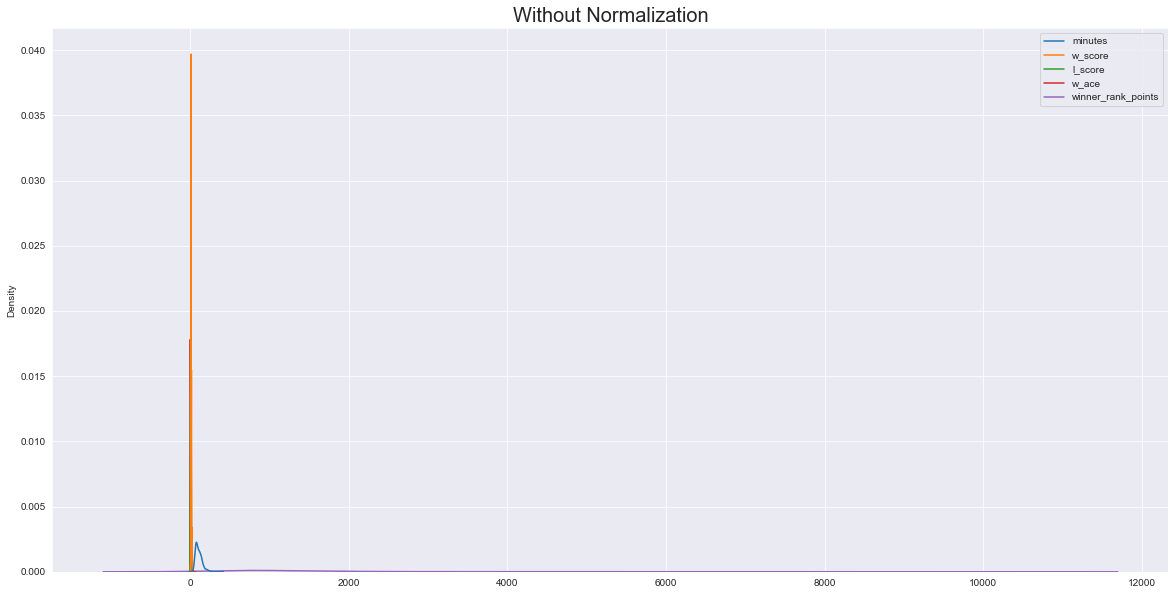

In [38]:
plt.figure(figsize=(20,10))
sns.kdeplot(data = atp_2018[['minutes', 'w_score', 'l_score', 'w_ace', 'winner_rank_points']])
plt.title(label = 'Without Normalization', fontsize = 20)
plt.show()

We can see that atributes distributions are very much out of scale.

**Min-Max feature scaling**

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.

**value scaled = (value – xmin) / (xmax – xmin)**

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
atp_2018_numn_minmax = pd.DataFrame(MinMaxScaler().fit_transform(atp_2018_numn))
atp_2018_numn_minmax.columns = atp_2018_numn.columns
atp_2018_numn_minmax.tail()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2855,0.827586,0.866667,0.551181,0.218750,0.1250,0.587361,0.512953,0.413580,0.537037,0.510638,0.421053,0.56,0.311475,0.388889,0.564286,0.457547,0.417647,0.653061,0.479167,0.454545,0.535714,0.249451,0.007642,0.211538,0.010001
2856,0.379310,0.266667,0.152231,0.203125,0.0625,0.182156,0.150259,0.166667,0.259259,0.191489,0.052632,0.04,0.196721,0.055556,0.182143,0.183962,0.176471,0.122449,0.166667,0.136364,0.178571,0.358791,0.003491,0.215385,0.009341
2857,0.586207,0.400000,0.314961,0.140625,0.4375,0.342007,0.264249,0.240741,0.481481,0.276596,0.105263,0.12,0.081967,0.166667,0.292857,0.183962,0.194118,0.469388,0.270833,0.227273,0.285714,0.075824,0.038683,0.189011,0.011982
2858,0.344828,0.133333,0.112861,0.031250,0.2500,0.133829,0.093264,0.104938,0.203704,0.127660,0.052632,0.04,0.065574,0.055556,0.125000,0.094340,0.076471,0.163265,0.125000,0.045455,0.178571,0.151099,0.017643,0.525824,0.001227
2859,0.724138,0.633333,0.398950,0.156250,0.3750,0.420074,0.357513,0.339506,0.537037,0.404255,0.052632,0.08,0.065574,0.000000,0.407143,0.311321,0.317647,0.591837,0.375000,0.227273,0.250000,0.600549,0.000660,0.664835,0.000377


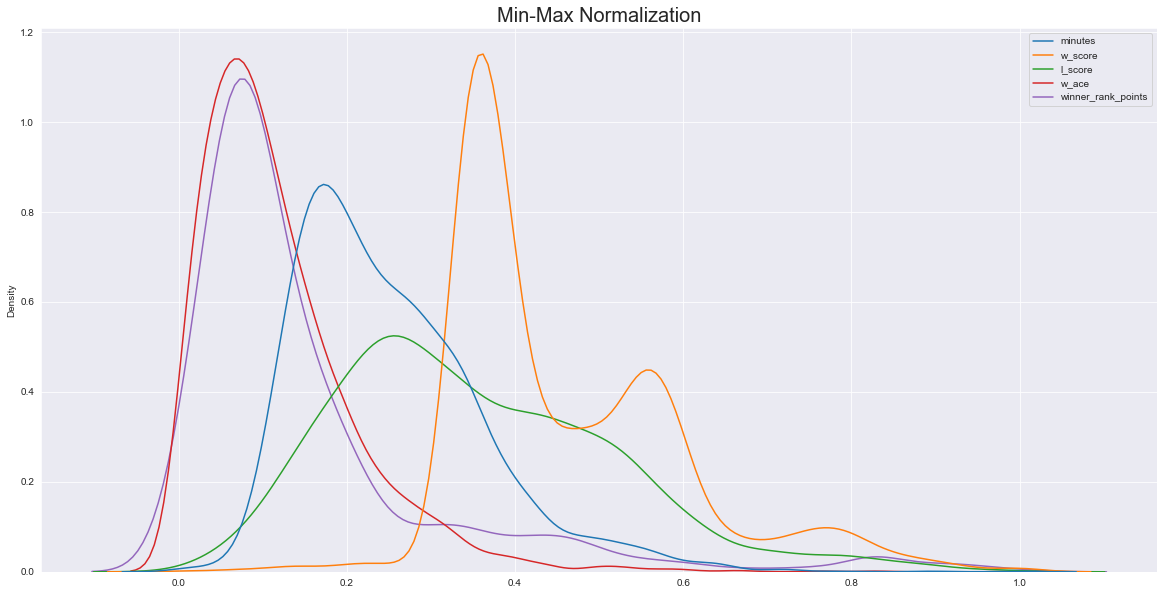

In [41]:
plt.figure(figsize=(20,10))
sns.kdeplot(data = atp_2018_numn_minmax[['minutes', 'w_score', 'l_score', 'w_ace', 'winner_rank_points']])
plt.title(label = 'Min-Max Normalization', fontsize = 20)
plt.show()

Much easier to interpret with normalized data.

**RobustScaler**

This technique removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

**value scaled = (value – median) / (p75 – p25)**

In [42]:
from sklearn.preprocessing import RobustScaler

In [43]:
atp_2018_rb = pd.DataFrame(RobustScaler(quantile_range = (25.0, 75.0)).fit_transform(atp_2018_numn))
atp_2018_rb.columns = atp_2018_numn.columns
atp_2018_rb.head()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0.166667,0.285714,0.375000,0.428571,0.000000,0.184211,0.125000,0.235294,0.444444,0.2,1.25,1.0,1.000000,0.000000,0.051282,0.00,0.052632,0.555556,0.333333,-0.6,-0.666667,-0.014706,-0.008421,-0.210526,0.155049
1,-0.333333,-0.571429,-0.535714,-0.428571,0.333333,-0.736842,-0.708333,-0.470588,-0.666667,-0.6,-0.75,-0.8,0.500000,0.666667,-0.615385,-0.64,-0.421053,-0.666667,-0.500000,-0.4,-0.500000,-0.470588,0.812632,-0.355263,0.361782
2,0.000000,0.285714,0.339286,-0.428571,-0.333333,0.210526,0.500000,0.235294,0.000000,0.0,0.75,0.8,0.166667,-0.333333,0.384615,0.24,0.368421,0.444444,0.000000,0.2,-0.166667,0.205882,-0.096000,-0.421053,0.587555
3,0.666667,0.571429,1.321429,-0.142857,0.666667,0.973684,1.000000,1.235294,0.444444,0.8,1.25,1.0,1.000000,1.666667,0.743590,0.28,0.526316,1.222222,0.500000,0.0,-0.166667,-0.176471,0.291368,-0.302632,0.387623
4,-0.166667,0.714286,0.535714,-0.285714,2.000000,0.394737,-0.166667,-0.117647,0.777778,0.4,0.75,1.0,0.833333,0.333333,0.230769,0.40,0.684211,-0.222222,0.333333,-0.4,-0.666667,0.485294,-0.256842,-0.421053,0.546753


In [44]:
atp_2018_rb.describe()

,w_score,l_score,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000,2860.000000
mean,0.224650,0.078571,0.154655,0.214136,0.275641,0.128515,0.147990,0.162916,0.086946,0.177063,0.112850,0.199161,0.285140,0.168415,0.129720,0.128951,0.106073,0.140559,0.108159,0.157552,0.083683,0.519791,0.537047,0.779476,0.366433
std,0.670784,0.710462,0.750362,0.855196,0.793647,0.773344,0.800064,0.829990,0.756505,0.873474,0.743019,0.784601,0.893028,0.856020,0.754519,0.772222,0.774458,0.791231,0.723230,0.660378,0.695755,2.390735,1.510110,3.194062,1.431486
min,-2.000000,-1.428571,-1.553571,-0.857143,-0.666667,-1.736842,-1.708333,-1.823529,-1.555556,-2.000000,-0.750000,-0.800000,-0.666667,-1.000000,-1.717949,-1.640000,-1.631579,-1.444444,-1.666667,-0.800000,-1.333333,-0.691176,-0.858105,-0.881579,-1.079905
25%,-0.333333,-0.428571,-0.410714,-0.428571,-0.333333,-0.447368,-0.416667,-0.411765,-0.444444,-0.400000,-0.500000,-0.400000,-0.333333,-0.333333,-0.435897,-0.440000,-0.473684,-0.444444,-0.500000,-0.400000,-0.500000,-0.411765,-0.305263,-0.407895,-0.401564
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.571429,0.589286,0.571429,0.666667,0.552632,0.583333,0.588235,0.555556,0.600000,0.500000,0.600000,0.666667,0.666667,0.564103,0.560000,0.526316,0.555556,0.500000,0.600000,0.500000,0.588235,0.694737,0.592105,0.598436
max,2.833333,2.857143,5.250000,8.285714,4.666667,5.342105,6.333333,7.705882,4.444444,7.400000,4.000000,4.200000,9.500000,5.000000,5.461538,6.840000,7.315789,4.000000,6.333333,3.600000,3.333333,26.073529,8.067368,23.065789,13.335600


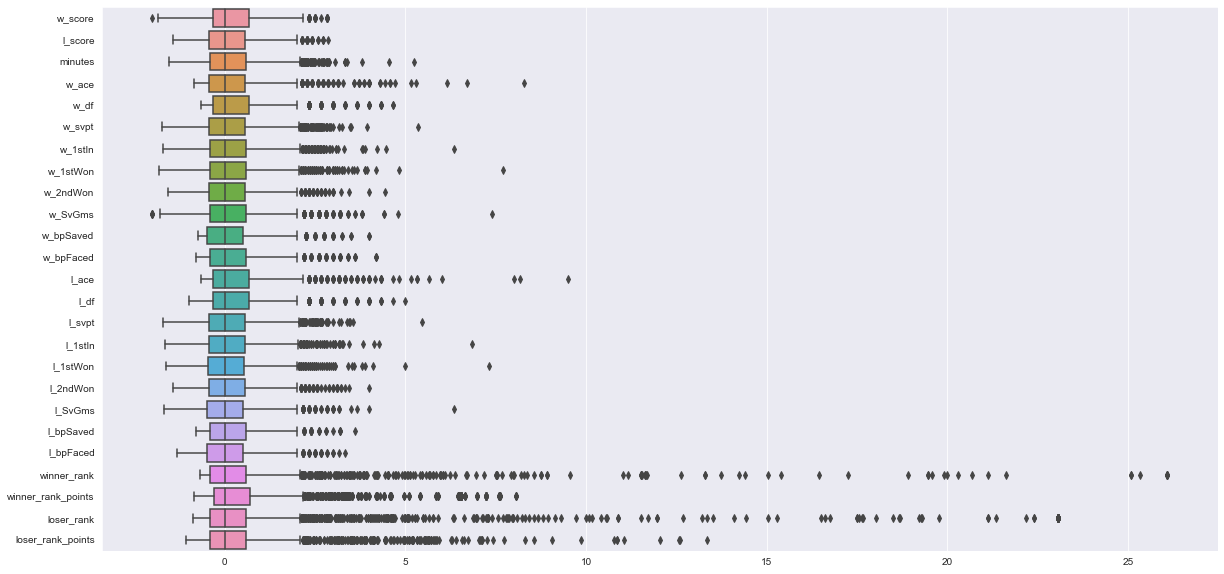

In [45]:
plt.figure(figsize=(20,10))
bxplot = sns.boxplot(data = atp_2018_rb, orient="h")

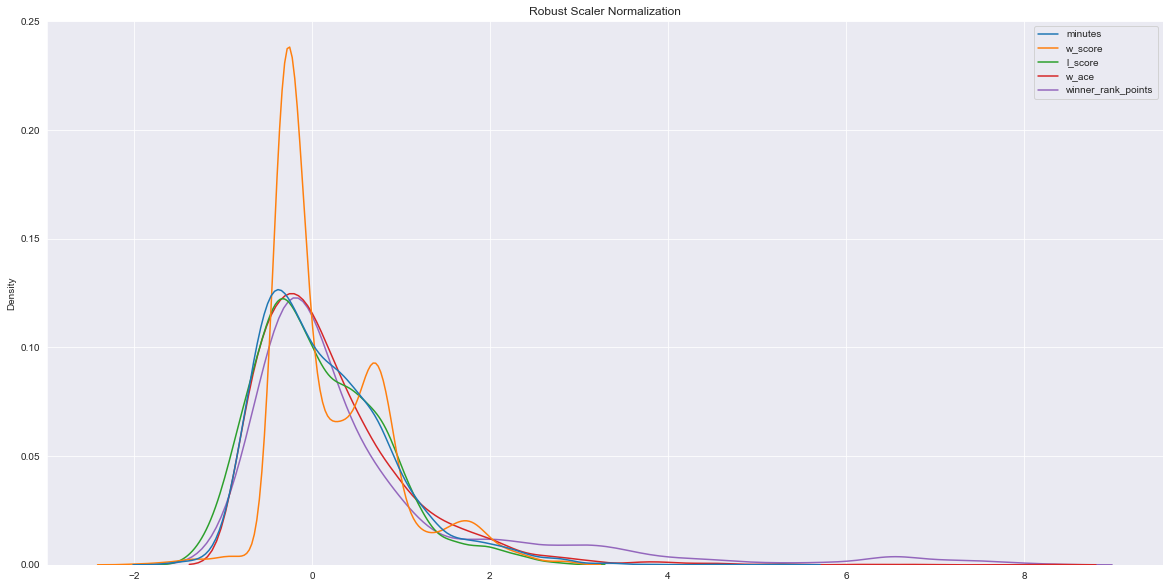

In [46]:
plt.figure(figsize=(20,10))
sns.kdeplot(data = atp_2018_rb[['minutes', 'w_score', 'l_score', 'w_ace', 'winner_rank_points']])
plt.title(label = 'Robust Scaler Normalization')
plt.show()

We can see that outliers are contemplated by this **RobustScaler** as the x axis goes up to 8-9 whereas in Normalization goest up to 1.